## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
real_estate = pd.read_csv('assets/real_estate.csv', sep=';')

#### What is the most expensive home in the dataset? (★☆☆)

In [4]:
row_most_exp = np.argmax(real_estate['price'])
print('Most expensive home is:', real_estate.loc[row_most_exp, 'realEstate_name'], 'which costs:', real_estate.loc[row_most_exp, 'price'])

Most expensive home is: engel volkers torrelodones which costs: 8500000


#### What is cheapest home in the dataset? (★☆☆)

In [5]:
# Filtro homes con price > 0
real_estate = real_estate[real_estate['price'] > 0]
row_cheapest = np.argmin(real_estate['price'])
print('Cheapest home is:', real_estate.loc[row_cheapest, 'realEstate_name'], 'which costs:', real_estate.loc[row_cheapest, 'price'])

Cheapest home is: esalje which costs: 0


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [6]:
row_biggest = np.argmax(real_estate['surface'])
print('Biggest home is:', real_estate.loc[row_biggest, 'realEstate_name'], 'which has a surface of:', real_estate.loc[row_biggest, 'surface'])

row_smallest = np.argmin(real_estate['surface'])
print('Smallest home is:', real_estate.loc[row_smallest, 'realEstate_name'], 'which has a surface of:', real_estate.loc[row_smallest, 'surface'])

Biggest home is: habitarium inmobiliaria which has a surface of: 249000.0
Smallest home is: toledo21 which has a surface of: 15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [7]:
diff_level5 = len(real_estate.groupby('level5').sum())
print('There are', diff_level5, 'different populations (level5)')

There are 168 different populations (level5)


#### Does the dataset contain NAs? (★☆☆)


In [8]:
print('Does the dataset contain NAs?:', real_estate.isnull().values.any())

Does the dataset contain NAs?: True


#### Delete the NAs of the dataset, if applicable (★★☆)

In [9]:
data_frame_no_nulls = real_estate.dropna()
print(data_frame_no_nulls)

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [10]:
level5_arroyomolinos_prices = real_estate.loc[real_estate['level5']=='Arroyomolinos (Madrid)']['price']
mean_price_arroyomolinos = level5_arroyomolinos_prices.mean()
print('Mean price in the population (level5) of Arroyomolinos (Madrid):', int(mean_price_arroyomolinos))

Mean price in the population (level5) of Arroyomolinos (Madrid): 294541


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

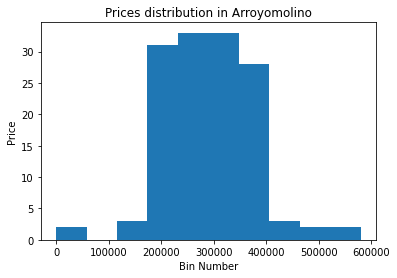

In [18]:
#level5_arroyomolinos = real_estate.loc[real_estate['level5']=='Arroyomolinos (Madrid)']
level5_arroyomolinos_prices = real_estate.loc[real_estate['level5']=='Arroyomolinos (Madrid)']['price']
mean_price_arroyomolinos = level5_arroyomolinos_prices.mean()

#plt.hist(level5_arroyomolinos_prices)
plt.hist(level5_arroyomolinos_prices, 10, histtype = 'bar')
plt.ylabel("Price")
plt.xlabel("Bin Number")
plt.title("Prices distribution in Arroyomolino")
plt.show()


#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [13]:
madrid_south_belt_cities = sorted(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])
madrid_south_belt = real_estate[real_estate['level5'].isin(madrid_south_belt_cities)]

#### Make a bar plot of the median of prices (★★★) 

MEDIAN PRICE FOR EACH POPULATION IN MADRID'S SOUTH BELT:
 level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         285305.0
Leganés        169950.0
Name: price, dtype: float64


<AxesSubplot:xlabel='level5'>

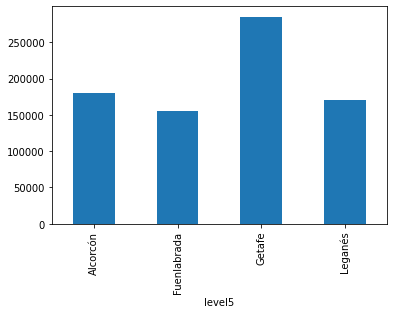

In [19]:
median_price_mad_south_belt = madrid_south_belt.groupby('level5')['price'].median()
print("Median price for each population in Madrid's South Belt:\n".upper(), median_price_mad_south_belt)

median_price_mad_south_belt.plot(kind='bar')

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [20]:
columns = ['price', 'rooms', 'surface', 'bathrooms']
mean_data_mad_south_belt = madrid_south_belt.groupby('level5').mean().filter(columns)
print("Mean price, rooms, surface and bathrooms for each population in Madrid's South Belt:\n".upper(), mean_data_mad_south_belt)

variance_data_mad_south_belt = madrid_south_belt.groupby('level5').var().filter(columns)
print("Variance of price, rooms, surface and bathrooms for each population in Madrid's South Belt:\n".upper(), variance_data_mad_south_belt)

MEAN PRICE, ROOMS, SURFACE AND BATHROOMS FOR EACH POPULATION IN MADRID'S SOUTH BELT:
                      price     rooms     surface  bathrooms
level5                                                     
Alcorcón     230071.052632  2.914894  105.913295   1.623656
Fuenlabrada  177198.021459  3.025974  103.624365   1.445415
Getafe       265040.500000  3.151724  126.896266   1.865052
Leganés      208682.010309  2.906736  105.852273   1.518135
VARIANCE OF PRICE, ROOMS, SURFACE AND BATHROOMS FOR EACH POPULATION IN MADRID'S SOUTH BELT:
                     price     rooms      surface  bathrooms
level5                                                     
Alcorcón     1.594783e+10  0.933895  4244.323834   0.592735
Fuenlabrada  4.701021e+09  0.355844  2264.643893   0.353367
Getafe       2.098267e+10  0.772748  5828.110028   0.658809
Leganés      1.191394e+10  0.824590  3987.475195   0.553055


#### What is the most expensive home of each population? (★★☆) 

In [21]:
columns = ['realEstate_name', 'price']
most_exp_mad_south_belt = madrid_south_belt.groupby('level5')['realEstate_name', 'price'].max()
print("Most expensive home for each population in Madrid's South Belt:\n".upper(), most_exp_mad_south_belt)

MOST EXPENSIVE HOME FOR EACH POPULATION IN MADRID'S SOUTH BELT:
                                         realEstate_name    price
level5                                                          
Alcorcón           vivienda madrid usera plaza eliptica   950000
Fuenlabrada                                       zosma   490000
Getafe       world house group soluciones inmobiliarias  1050000
Leganés                                     zome madrid   650000


/tmp/ipykernel_1169/2413915196.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_exp_mad_south_belt = madrid_south_belt.groupby('level5')['realEstate_name', 'price'].max()


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

/tmp/ipykernel_1169/2620296030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_south_belt_price_normal['price'] = ( (madrid_south_belt['price'] - madrid_south_belt['price'].min()) / (madrid_south_belt['price'].max() - madrid_south_belt['price'].min()) )


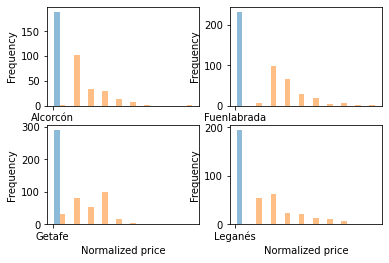

In [22]:
madrid_south_belt_price_normal = madrid_south_belt[['level5', 'price']]
madrid_south_belt_price_normal['price'] = ( (madrid_south_belt['price'] - madrid_south_belt['price'].min()) / (madrid_south_belt['price'].max() - madrid_south_belt['price'].min()) )

#Split DataFrame based on population:
population_specific_data_frames = [
    madrid_south_belt_price_normal[madrid_south_belt_price_normal['level5'] == population]
    for population in madrid_south_belt_cities
]

for index, population_data_frame in enumerate(population_specific_data_frames) :
    plt.subplot(2, 2, index + 1)
    plt.xlabel('Normalized price')
    plt.ylabel('Frequency')
    plt.hist(population_data_frame, alpha=0.5,
        label=population_data_frame['level5'].iloc[0])

plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [23]:
# Price per m2 in Getafe:
getafe_homes = madrid_south_belt[madrid_south_belt['level5'] == 'Getafe'][['price', 'surface']]
getafe_prices_per_m2 = getafe_homes['price'].mean() / getafe_homes['surface'].mean()
print("Getafe's mean price per sq meter is", int(getafe_prices_per_m2))

# Price per m2 in Alcorcón:
alcorcon_homes = madrid_south_belt[madrid_south_belt['level5'] == 'Alcorcón'][['price', 'surface']]
alcorcon_price_per_m2 = alcorcon_homes['price'].mean() / alcorcon_homes['surface'].mean()
print("Alcorcón's mean price per sq meter is", int(alcorcon_price_per_m2))

Getafe's mean price per sq meter is 2088
Alcorcón's mean price per sq meter is 2172


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [25]:
# Valdemorillo
valdemorillo_homes = real_estate[real_estate['level5'] == 'Valdemorillo'][['price', 'surface']]
valdemorillo_mean_price = valdemorillo_homes['price'].mean()
valdemorillo_price_per_m2 = valdemorillo_mean_price / valdemorillo_homes['surface'].mean()

# Galapagar
galapagar_homes = real_estate[real_estate['level5'] == 'Galapagar'][['price', 'surface']]
galpagar_mean_price = galapagar_homes['price'].mean()
galpagar_price_per_m2 = galpagar_mean_price / galapagar_homes['surface'].mean()

print("Valdemorillo's mean price is:", int(valdemorillo_mean_price) , "and mean price per sq meter is" , int(valdemorillo_price_per_m2))
print("Galpagar's mean price is:", int(galpagar_mean_price), "and mean price per sq meter is" , int(galpagar_price_per_m2))

Valdemorillo's mean price is: 363860 and mean price per sq meter is 1039
Galpagar's mean price is: 360063 and mean price per sq meter is 1178


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [26]:
print("Valdemorillo's mean price is:", int(valdemorillo_mean_price) , "and mean price per sq meter is" , int(valdemorillo_price_per_m2))
print("Galpagar's mean price is:", int(galpagar_mean_price), "and mean price per sq meter is" , int(galpagar_price_per_m2))

Valdemorillo's mean price is: 363860 and mean price per sq meter is 1039
Galpagar's mean price is: 360063 and mean price per sq meter is 1178


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

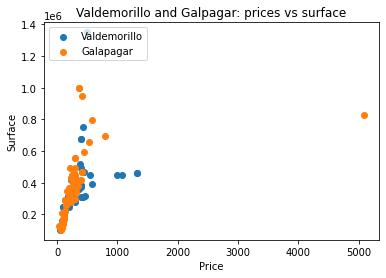

In [27]:
# price-surface scatter plot
plt.scatter(valdemorillo_homes['surface'], valdemorillo_homes['price'], label='Valdemorillo')
plt.scatter(galapagar_homes['surface'], galapagar_homes['price'], label='Galapagar')
plt.legend(loc='upper left')
plt.ylabel('Surface')
plt.xlabel('Price')
plt.title("Valdemorillo and Galpagar: prices vs surface")
plt.show

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

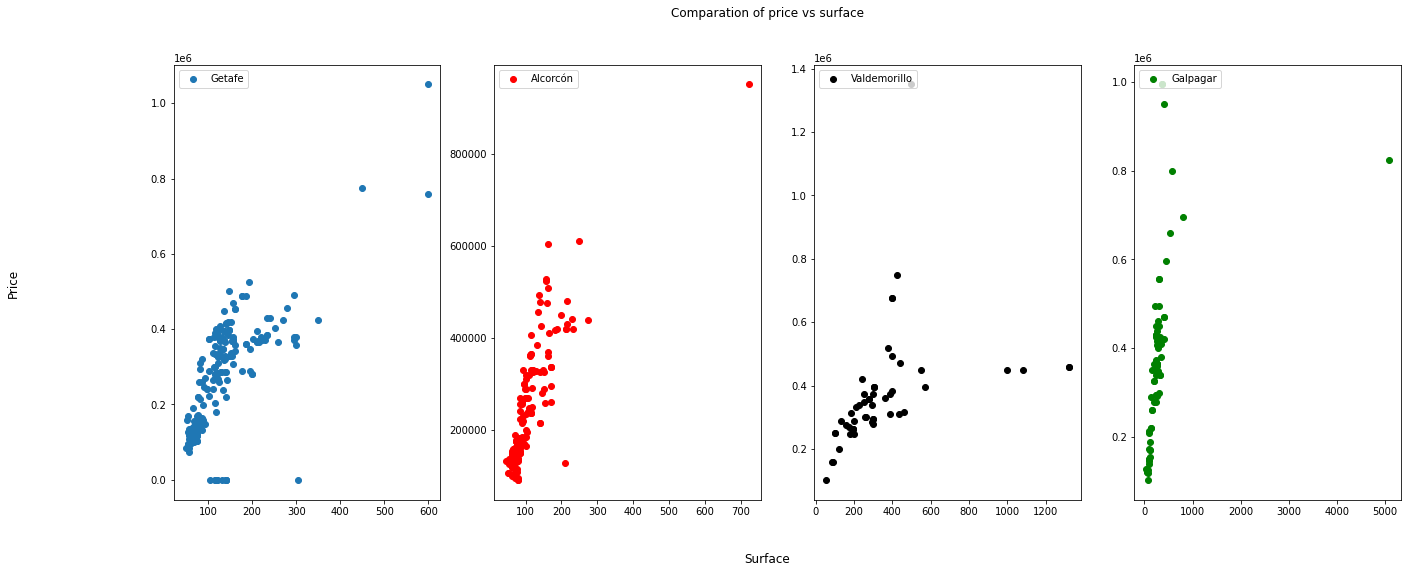

In [28]:
# 4 price-surface scatter plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22,8))
fig.suptitle('Comparation of price vs surface')
fig.supxlabel('Surface')
fig.supylabel('Price')
fig.set_figwidth

ax1.scatter(getafe_homes['surface'], getafe_homes['price'], label='Getafe')
ax1.legend(loc='upper left')

ax2.scatter(alcorcon_homes['surface'], alcorcon_homes['price'], label='Alcorcón', c='red')
ax2.legend(loc='upper left')

ax3.scatter(valdemorillo_homes['surface'], valdemorillo_homes['price'], label='Valdemorillo', c='black')
ax3.legend(loc='upper left')

ax4.scatter(galapagar_homes['surface'], galapagar_homes['price'], label='Galpagar', c='green')
ax4.legend(loc='upper left')

#### How many  real estate agencies the dataset contains? (★★☆) 

In [29]:
#Real Estate agencies:
diff_agencies = len(real_estate.groupby('id_realEstates').sum())
print('There are', diff_agencies, 'real estate agencies')

There are 14217 real estate agencies


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [33]:
homes_per_population = real_estate.groupby('level5').count()
print(homes_per_population['price'].sort_values(ascending=False))

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Navarredonda               1
Pinilla del Valle          1
Piñuécar-gandullas         1
Rascafría                  1
Montejo de la Sierra       1
Name: price, Length: 168, dtype: int64
